In [1]:
import os, math, random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
data_path = '/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/'
save_path = '/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/Resized_Data/'

In [19]:
avg_w= 0
avg_h = 0
c = 0
for super_folder in ['Test_Data','Train_Data']:
    for letter in [x for x in os.listdir(data_path+super_folder)if not x.startswith(".")]:
        for file in [x for x in os.listdir(data_path+super_folder+"/"+letter) if not x.startswith(".")]:
            
            load_path = data_path+super_folder+"/"+letter+"/"+file
            
            try:
                #img = load_image(load_path)
                img =cv2.imread(load_path,0)
                h,w = np.shape(img)
            except: 
                print(load_path)
                
            #if(not os.path.isdir(save_path+super_folder+"/"+letter)):
            #    os.system("mkdir " + save_path + super_folder+"/"+letter)
         
            
            c+=1
            avg_w += w
            avg_h += h
            #write_path = save_path+super_folder+"/"+letter+"/"+file
            #try:
            #pass
                #cv2.imwrite(write_path,img)
            #except:
            #    print(write_path)
            
            
print(avg_w/c, avg_h/c)

/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/Train_Data/Multi-letter/Multi-letter_5.png
38.00284191829485 47.46003552397868


/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/Resized_Data/Train_Data/Multi-letter

In [4]:
def load_image(img_path):
    img = cv2.imread(img_path,0)
    return(preprocess_image(img))

In [5]:
def add_border(image, padding, value):
    height, width = np.shape(image)

    new_image = value*np.ones([height+2*padding, width+2*padding])

    new_image[padding:padding+height, padding:padding+width] = image.copy()

    return new_image.astype(np.uint8)


In [6]:
def binarize_image(img):
    binarized_image = img.copy()
    threshold = 127
    binarized_image[img<=threshold] = 1
    binarized_image[img>threshold] = 0
    
    return binarized_image


In [7]:
def extract_biggect_component(binarized_image):
    output = cv2.connectedComponentsWithStats(binarized_image, 4, cv2.CV_32S)
    labels = output[1]
    stats = output[2]
    
    biggest_components =  np.argsort(-stats[:,4])
    
    if(stats[biggest_components[0],0] == 0 and stats[biggest_components[0],1] == 0 ):
        biggest_component = biggest_components[1]
    else:
        biggest_component = biggest_components[0]
    
    binarized_image[labels != biggest_component] = 0
    binarized_image[labels == biggest_component] = 1
    #Get bounding box of resulting image
    left,top,width,height = stats[biggest_component,0:4]

    x1 = left
    x2 = left + width
    y1 = top
    y2 = top + height

    boxed_image = binarized_image[y1:y2,x1:x2].astype(np.uint8)
    
    return boxed_image    

In [8]:
def blur_image(img, sigma=0.5):
    temp = img.copy()
    smooth_image = 255*cv2.GaussianBlur(temp.astype(np.float64),(3,3),sigmaX=sigma,sigmaY=sigma)
    
    return smooth_image
    

In [9]:
def preprocess_multi_letter(img):
    
    img = add_border(img,2,255)
    
    #Binarize image
    binarized_image = binarize_image(img)
    
    #Filter out biggest component
    boxed_image = extract_biggect_component(binarized_image)
    
    #Reshape, but keep ratio
    original_shape = np.array(np.shape(boxed_image))
    new_shape = ((original_shape/original_shape[0])*24).astype(int)
    
    resized_image = cv2.resize(boxed_image,dsize = (new_shape[1],new_shape[0]))
    
    #Add border again after boxing
    temp = add_border(resized_image,2,0)
    
    #Blur
    smooth_image = blur_image(temp)
    
    


    return smooth_image.astype(np.uint8)

In [10]:
def preprocess_single_letter(img):
    
    img = add_border(img,2,255)

    #Binarize image
    binarized_image = binarize_image(img)
    
    #Filter out biggest component
    boxed_image = extract_biggect_component(binarized_image)

    #Reshape, but keep ratio
    original_shape = np.shape(boxed_image)
    new_shape = (original_shape/np.max(original_shape)*25).astype(int)
    resized_image = cv2.resize(boxed_image,dsize = (new_shape[1],new_shape[0]))
    
    #Blur
    sigma = 0.5
    smooth_image = 255*cv2.GaussianBlur(resized_image.astype(np.float64),(3,3),sigmaX=sigma,sigmaY=sigma)
    
    #Zeropad to make it desired size
    height,width  = new_shape

    left_padding = (28-width)//2
    top_padding = (28-height)//2

    padded_image = np.zeros([28,28])
    padded_image[top_padding:top_padding+height, left_padding:left_padding+width] = smooth_image

    return padded_image.astype(np.uint8)

(28, 28)

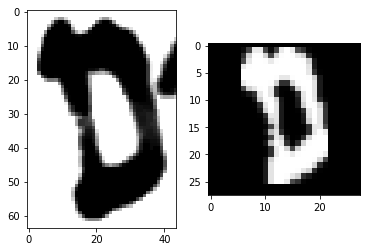

In [24]:
letter = random.choice(os.listdir(data_path+"Train_Data/"))
file = random.choice(os.listdir(data_path+"Train_Data/"+letter))
img = cv2.imread(data_path+"Train_Data/"+letter+"/"+file,0)
pimg= preprocess_single_letter(img)
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.imshow(pimg,cmap="gray")
np.shape(pimg)

In [26]:
file

'Mem_162.png'

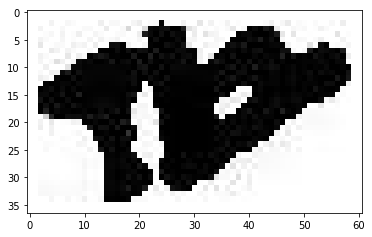

In [68]:
a= add_border(img,2,255)
plt.imshow(a,cmap="gray")

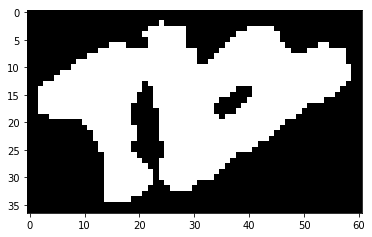

In [69]:
b = binarize_image(a)
plt.imshow(b,cmap="gray")


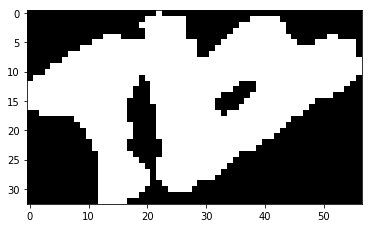

In [70]:
c = extract_biggect_component(b)
plt.imshow(c,cmap="gray")

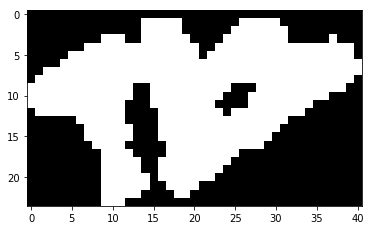

In [71]:
original_shape = np.array(np.shape(c))
new_shape = ((original_shape/original_shape[0])*24).astype(int)
    
d = cv2.resize(c,dsize = (new_shape[1],new_shape[0]))
plt.imshow(d,cmap="gray")

In [72]:
np.shape(d)

(24, 41)

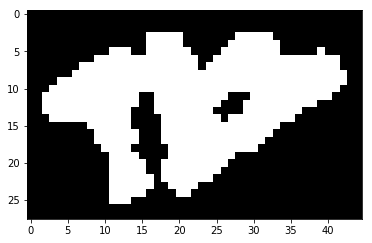

In [73]:
f = add_border(d,2,0)
plt.imshow(f,cmap="gray")

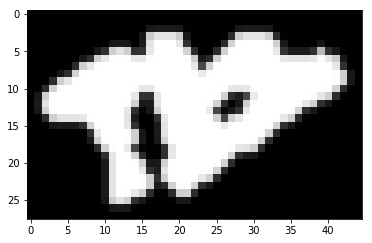

In [74]:
e = blur_image(f)
plt.imshow(e,cmap="gray")

In [75]:
np.shape(e)

(28, 45)

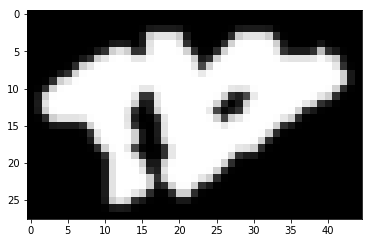

In [79]:
plt.imshow(preprocess_multi_letter(img),cmap="gray")